In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pywaffle
from pywaffle import Waffle
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 12.3 MB/s eta 0:00:00


In [2]:
data = pd.read_csv('/content/HateSpeechDatasetBalanced.csv')

In [3]:
data.describe()

,Label
count,726119.000000
mean,0.502018
std,0.499996
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [4]:
# check the dimension of dataset
num_rows, num_cols = data.shape
print('The dataset contains {} rows and {} columns.'.format(num_rows, num_cols))

The dataset contains 726119 rows and 2 columns.


In [5]:
# check the attributes in the dataset
print('Attributes in the dataset: ', data.columns.values)

Attributes in the dataset:  ['Content' 'Label']


In [6]:
data.head()

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


Attributes Description:

Content: text comment

Label: label of the Content - '0': means non-hateful, '1': means hateful

In [ ]:
!pip install emoji
!pip install contractions
!pip install autocorrect
!pip install pywaffle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=fd9177e3b6fccbf33bf61fda56473cbd78bdbb9ddc93f6d5a094d60d6f4d0160
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 44.8 MB/s eta 0:00:00


In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Sample data before preprocessing:
409237                                             sto late
203716    i commented and noted that whatever have actua...
580082    retweet norway sees huge drop offense as tumid...
578485    a retweet i swear i am like not any sexist onl...
175471    introduction to get away from the personal att...
Name: Content, dtype: object
Sample data after initial cleaning:
443789    retweet for ew to she which is not so ugly who...
556112    doctors fightback from gdp is also cold term i...
405805                                         holy crap mr
105859    i will superhero my ass out there and blow the...
452980                                  it almost doomed us
Name: cleaned_text_1, dtype: object
Sample data after spell correction and POS tagging:
                                           cleaned_text_2  \
147844  sites bastard sites is a bastard crook rogue v...   
636499                         you believe in me not liar   
546154  atomic number   can no

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sample data after final preprocessing:
104100                                                 text
510329    woman essentially feminine antithesis emotiona...
560631    melody feature different feature spine melody ...
512168    one joined rude rope head one joined joined ru...
273817    article comprehensive list alumnus much larges...
Name: processed_text, dtype: object


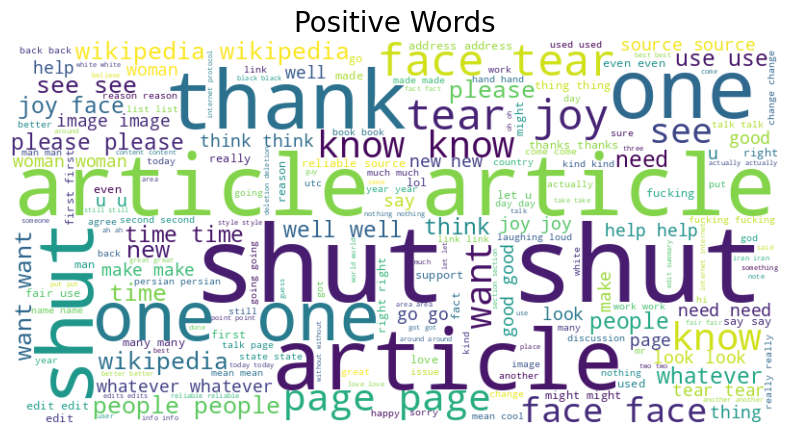

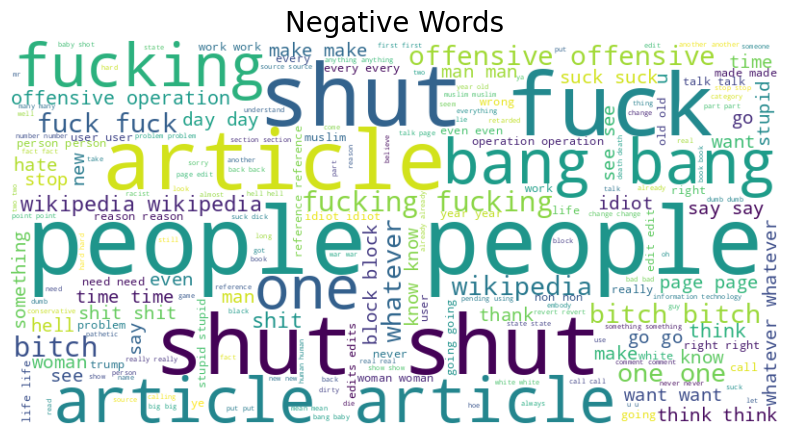

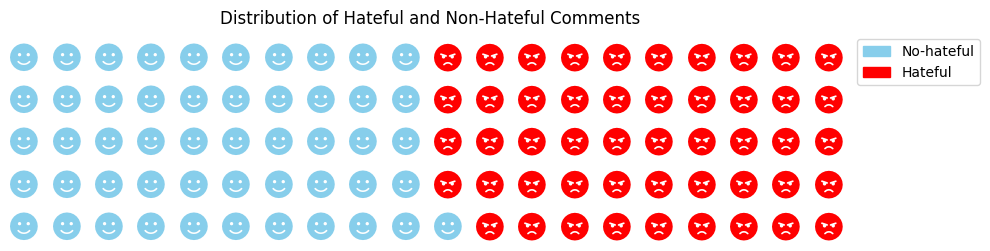

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        81
           1       0.70      0.76      0.73        82

    accuracy                           0.71       163
   macro avg       0.71      0.71      0.71       163
weighted avg       0.71      0.71      0.71       163

The text: 'Please shut the door gently as you leave.' is classified as: No-hateful
The text: 'Shut up, no one wants to hear your nonsense.' is classified as: Hateful
The text: 'I wanted to lose weight, so I went to the paint store. I heard you could get thinner there.' is classified as: No-hateful
The text: 'I always tell new hires, Don’t think of me as your boss think of me as your friend who can fire you.' is classified as: Hateful


In [ ]:
import pandas as pd
import re
import emoji
import contractions
import spacy
from autocorrect import Speller
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
from pywaffle import Waffle
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Load data
data = pd.read_csv('HateSpeechDatasetBalanced.csv')

# Randomly sample 1000 rows from the dataset
data = data.sample(n=1000, random_state=42)

# Display sample data before preprocessing
print("Sample data before preprocessing:")
print(data['Content'].sample(5))

# Step 1: Initial cleaning and handling symbols
def initial_cleaning(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'\d+', '', text)
    text = emoji.demojize(text)
    text = contractions.fix(text)
    return text

data['cleaned_text_1'] = data['Content'].apply(initial_cleaning)

# Display sample data after initial cleaning
print("Sample data after initial cleaning:")
print(data['cleaned_text_1'].sample(5))

# Step 2: Spell correction, POS tagging, and punctuation handling
nlp = spacy.load('en_core_web_lg')
spell = Speller(lang='en')

def spell_correction_and_pos_tagging(text):
    doc = nlp(text)
    named_entities = [ent.text for ent in doc.ents]

    corrected_text = []
    pos_tags = []
    for token in doc:
        if token.text not in named_entities:
            corrected_text.append(spell(token.text))
        else:
            corrected_text.append(token.text)
        pos_tags.append((token.text, token.pos_))

    text = ' '.join(corrected_text)
    text = re.sub(r'[^\w\s]', '', text)
    return text, pos_tags

data['cleaned_text_2'], data['pos_tags'] = zip(*data['cleaned_text_1'].apply(spell_correction_and_pos_tagging))

# Display sample data after spell correction and POS tagging
print("Sample data after spell correction and POS tagging:")
print(data[['cleaned_text_2', 'pos_tags']].sample(5))

# Step 3: Tokenization, lemmatization, stop words removal, and n-grams
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
stopwords_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
sia = SentimentIntensityAnalyzer()

def final_preprocessing(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in stopwords_list]
    tokens = [token.lower() for token in tokens]
    n_grams = zip(*[tokens[i:] for i in range(2)])
    n_grams = [" ".join(ngram) for ngram in n_grams]
    return ' '.join(tokens + n_grams)

data['processed_text'] = data['cleaned_text_2'].apply(final_preprocessing)

# Display sample data after final preprocessing
print("Sample data after final preprocessing:")
print(data['processed_text'].sample(5))

# Sentiment analysis and removal of neutral words
def get_sentiment(text):
    scores = sia.polarity_scores(text)
    return 'positive' if scores['compound'] > 0.05 else 'negative' if scores['compound'] < -0.05 else 'neutral'

data['sentiment'] = data['processed_text'].apply(get_sentiment)
data = data[data['sentiment'] != 'neutral']

positive_words = ' '.join(data[data['sentiment'] == 'positive']['processed_text'])
negative_words = ' '.join(data[data['sentiment'] == 'negative']['processed_text'])

# Generate word clouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

generate_wordcloud(positive_words, 'Positive Words')
generate_wordcloud(negative_words, 'Negative Words')

# Waffle chart to show the distribution of positive and negative comments
comments = data['Label'].value_counts()
percentage = (comments.values / data.shape[0]) * 100

figure = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=percentage,
    colors=['skyblue', 'red'],
    icons=['face-smile','face-angry'],
    icon_legend=False,
    legend={
        'labels': ['No-hateful', 'Hateful'],
        'loc': 'upper left',
        'bbox_to_anchor': (1, 1)
    },
    font_size=20,
    figsize=(10,6)
)

# Add a title to the figure
plt.title('Distribution of Hateful and Non-Hateful Comments')
plt.show()

# Model training for classification of new text
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['processed_text']).toarray()
y = data['Label']

# Split the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Classification of new text
def classify_text(text):
    cleaned_text = initial_cleaning(text)
    cleaned_text, _ = spell_correction_and_pos_tagging(cleaned_text)
    processed_text = final_preprocessing(cleaned_text)
    text_vector = vectorizer.transform([processed_text]).toarray()
    prediction = clf.predict(text_vector)
    return 'No-hateful' if prediction[0] == 0 else 'Hateful'

# Test the classification function
test_texts = ["Please shut the door gently as you leave.", "Shut up, no one wants to hear your nonsense.","I wanted to lose weight, so I went to the paint store. I heard you could get thinner there.","I always tell new hires, Don’t think of me as your boss think of me as your friend who can fire you."]
for new_text in test_texts:
    classification = classify_text(new_text)
    print(f"The text: '{new_text}' is classified as: {classification}")
